In [2]:
import math
import operator

import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

train_10 = pd.read_csv('train_data_mega_set_10_base.csv', index_col='year_month', header=1).iloc[1:, :]
train_12 = pd.read_csv('train_data_mega_set_12_base.csv', index_col='year_month', header=1).iloc[1:, :]
test_10 = pd.read_csv('test_data_mega_set_10_base.csv', index_col='year_month', header=1).iloc[1:, :]
test_12 = pd.read_csv('test_data_mega_set_12_base.csv', index_col='year_month', header=1).iloc[1:, :]

import numpy as np
feat_cols = ['201601', '201602', '201603', '201604', '201605', '201606', '201607',
       '201608', '201609', '201610', '201611', '201612', '201701', '201702',
       '201703', '201704', '201705', '201706', '201707', '201708', '201709',
       '201601.1', '201602.1', '201603.1', '201604.1', '201605.1', '201606.1',
       '201607.1', '201608.1', '201609.1', '201610.1', '201611.1', '201612.1',
       '201701.1', '201702.1', '201703.1', '201704.1', '201705.1', '201706.1',
       '201707.1', '201708.1', '201709.1', '201601.2', '201602.2', '201603.2',
       '201604.2', '201605.2', '201606.2', '201607.2', '201608.2', '201609.2',
       '201610.2', '201611.2', '201612.2', '201701.2', '201702.2', '201703.2',
       '201704.2', '201705.2', '201706.2', '201707.2', '201708.2', '201709.2',
       '201601.3', '201602.3', '201603.3', '201604.3', '201605.3', '201606.3',
       '201607.3', '201608.3', '201609.3', '201610.3', '201611.3', '201612.3',
       '201701.3', '201702.3', '201703.3', '201704.3', '201705.3', '201706.3',
       '201707.3', '201708.3', '201709.3', 'Unnamed: 86']
1

1

In [3]:

X_tr_10 = train_10[feat_cols]
X_tr_10_norm = (X_tr_10 - X_tr_10.mean()) / (X_tr_10.max() - X_tr_10.min())


In [4]:
X_tr_10_norm.head()

,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,...,201701.3,201702.3,201703.3,201704.3,201705.3,201706.3,201707.3,201708.3,201709.3,Unnamed: 86
year_month,,,,,,,,,,,,,,,,,,,,,
21-186G-1161,-0.008392,-0.008946,0.005284,0.015614,-0.026780,-0.024901,-0.003103,-0.014064,-0.018964,0.018782,...,-0.019066,-0.011115,-0.012119,-0.007838,-0.010630,-0.010035,-0.017272,-0.015564,-0.009802,0.000289
21-186G-1172,-0.008392,-0.008946,-0.016128,-0.028380,-0.026780,-0.024901,-0.024974,-0.014064,-0.018964,-0.014287,...,-0.019040,-0.011094,-0.012074,-0.007822,-0.010572,-0.010012,-0.017259,-0.015526,-0.009767,0.097063
21-186G-1190,0.002081,-0.003281,-0.016128,-0.028380,-0.026780,-0.021237,-0.024974,-0.014064,-0.018964,-0.012050,...,-0.019066,-0.011115,-0.012067,-0.007818,-0.010630,-0.010029,-0.017272,-0.013405,0.030842,0.097063
21-186G-1193,0.028095,0.000114,0.004641,-0.016559,-0.021393,-0.012673,-0.024974,-0.012853,-0.008026,-0.003178,...,-0.019066,-0.011115,-0.012119,-0.007838,-0.010659,-0.010040,-0.017272,-0.015564,-0.009802,0.032547
21-186G-12,-0.008392,0.021715,0.033846,0.028518,0.045568,-0.011011,-0.004204,0.024447,0.022395,0.006876,...,-0.019066,0.138679,-0.012119,-0.007838,-0.010659,-0.005575,-0.017272,-0.015531,-0.009767,-0.419066


In [8]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
dist_cos = pdist(X_tr_10_norm, 'cosine')



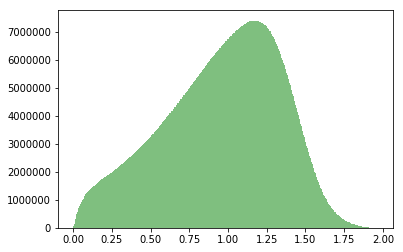

In [17]:
plt.hist(dist_cos, 500, color='green', alpha= 0.5)
plt.show()

In [12]:
from scipy.cluster import hierarchy
Z_cos = hierarchy.linkage( dist_cos, method='average' )

In [19]:
def hierarchy_draw(Z, labels, level):
    """Рисуем дендрограмму и сохраняем её"""
    plt.figure(figsize=(30,30))
    hierarchy.dendrogram(Z, labels=labels, color_threshold=level, leaf_font_size=5, count_sort=True)
    plt.show()


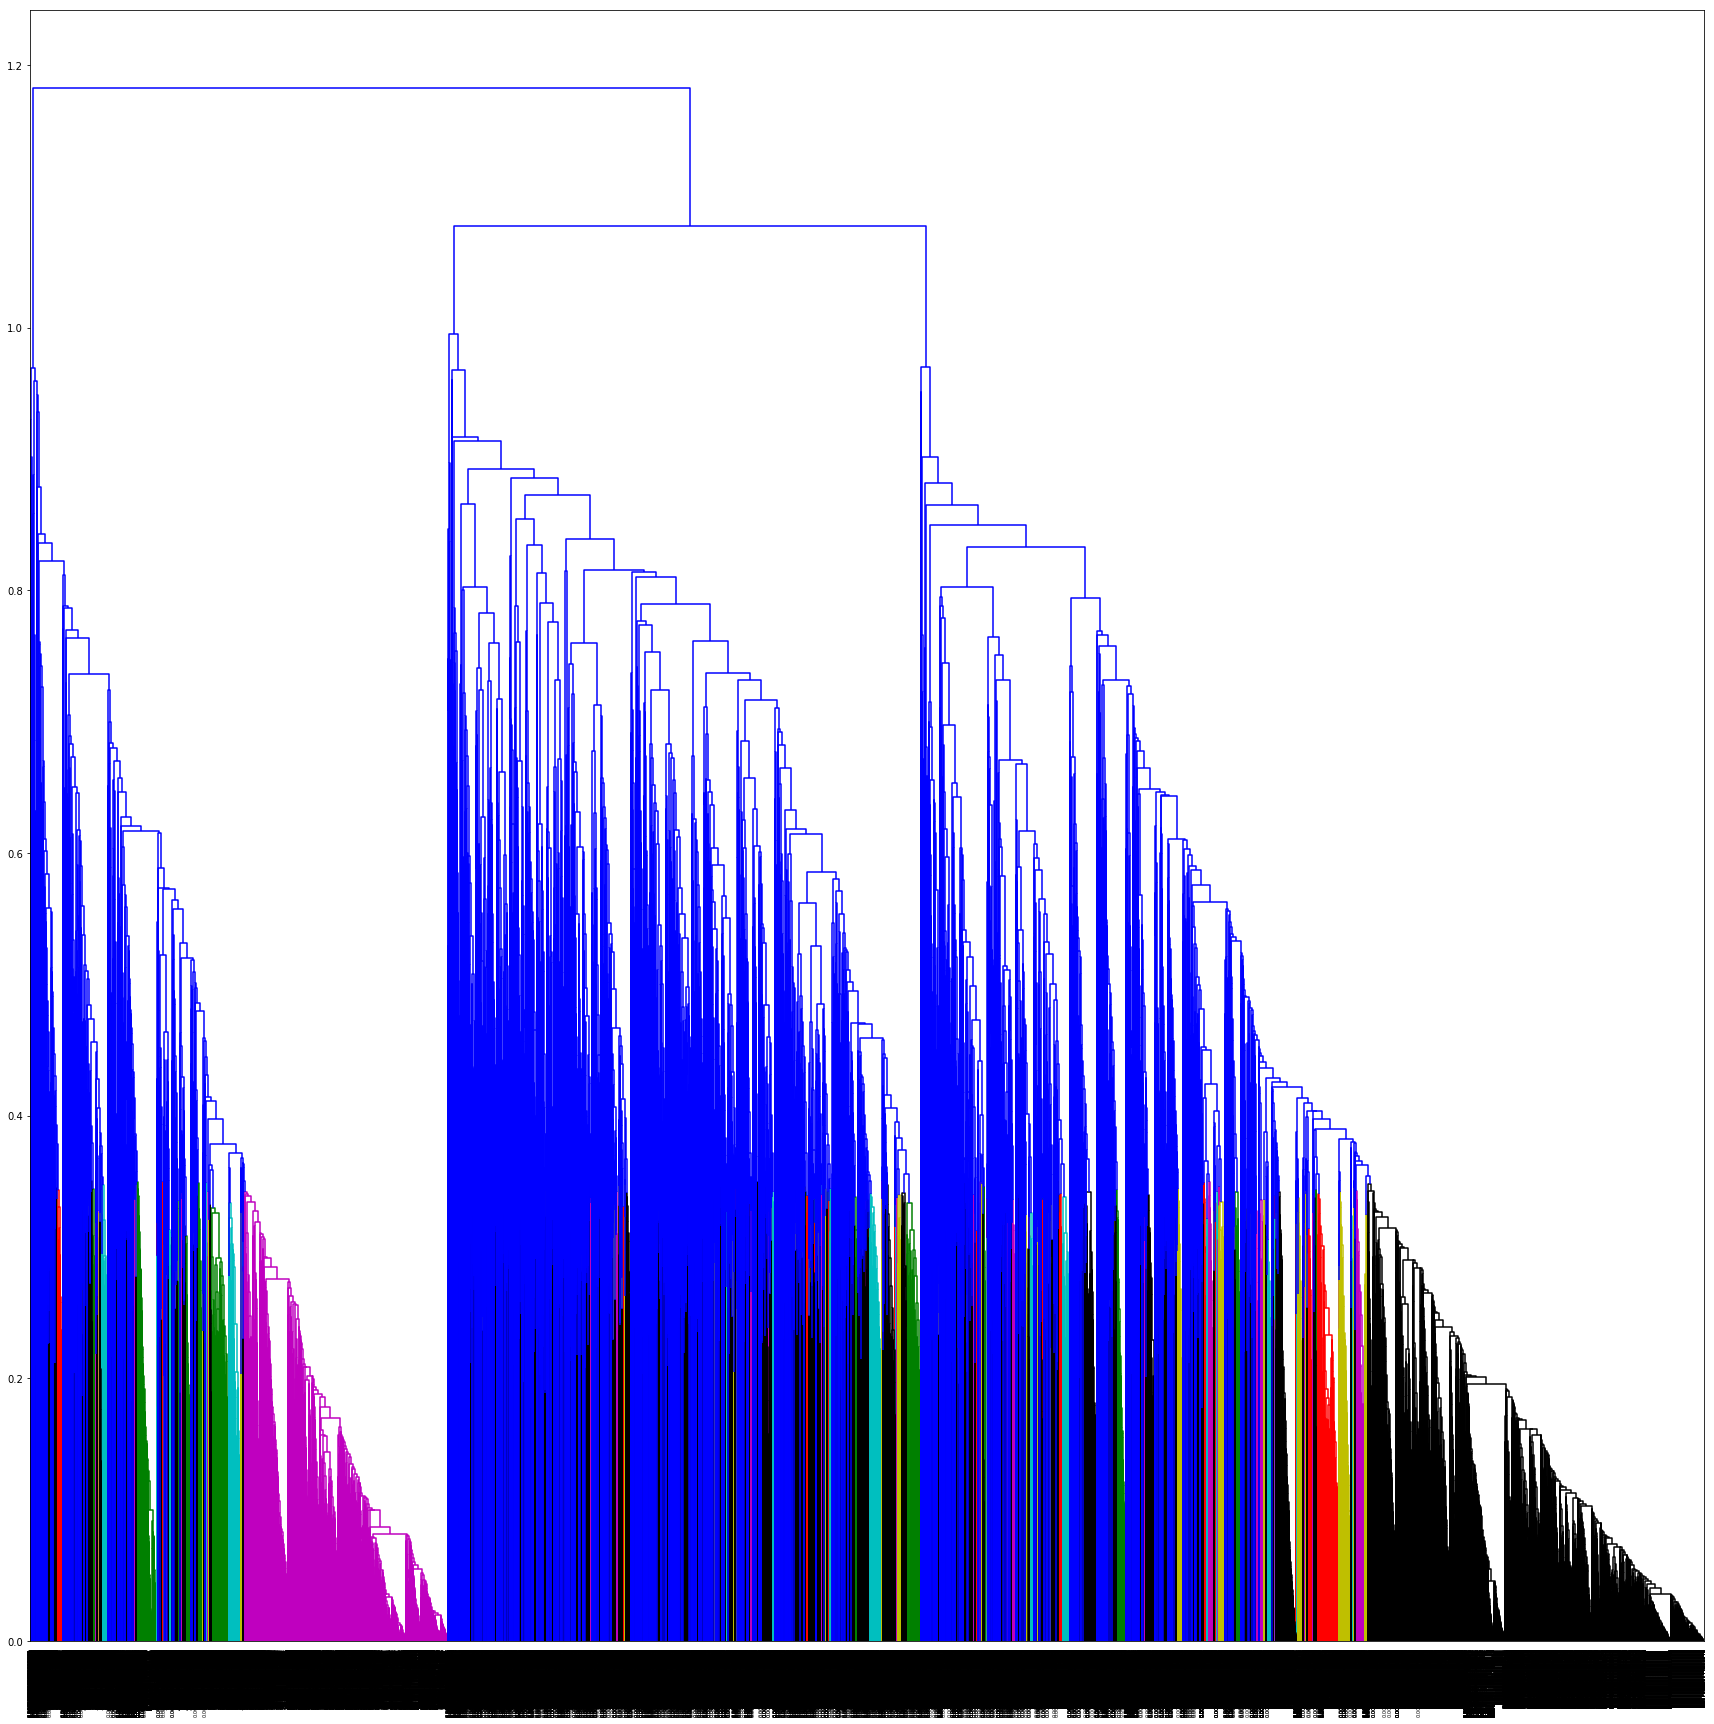

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

hierarchy_draw(Z_cos, X_tr_10_norm['Unnamed: 86'], 0.35)

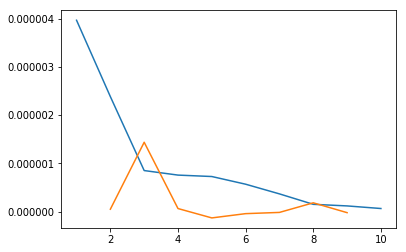

clusters: 3


In [41]:
last = Z_cos[:10, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print( "clusters:", k)

In [43]:

from scipy.cluster.hierarchy import fcluster
max_d = 1
clusters = fcluster(Z_cos, max_d, criterion='distance')
print(clusters.tolist())

[2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 

In [46]:
print(len(clusters))
print(len(X_tr_10_norm.index))
dictionary = dict(zip(X_tr_10_norm.index.tolist(), clusters))
dictionary

59602
59602


{'21-19EA-3006': 2,
 '21-187J-1696': 1,
 '21-19E7-3140': 1,
 '21-8AN-16230': 2,
 '21-19DP-1896': 2,
 '21-8A1-15951': 2,
 '21-8AC-16777': 2,
 '21-8B1-19582': 1,
 '21-8AE-4152': 1,
 '21-19DY-4086': 1,
 '21-8AC-15741': 1,
 '21-19DY-126': 2,
 '21-8AC-9081': 3,
 '21-8B0-2786': 1,
 '21-8AD-18904': 3,
 '21-8B1-6324': 1,
 '21-8B2-1238': 1,
 '21-8AC-1861': 3,
 '21-8AC-16101': 2,
 '21-1882-2872': 2,
 '21-8B0-7774': 1,
 '21-8B1-2044': 1,
 '21-8B2-589': 1,
 '21-1882-4988': 2,
 '21-19DP-385': 3,
 '21-8AD-11666': 3,
 '21-1882-3952': 3,
 '21-8B2-14030': 1,
 '21-1886-3993': 2,
 '21-8AF-10244': 2,
 '21-8AE-7227': 3,
 '21-8B1-8482': 1,
 '21-8AN-3527': 3,
 '21-8A1-15758': 3,
 '21-8AG-5138': 3,
 '21-19EA-844': 2,
 '21-8AF-8916': 3,
 '21-8B2-1005': 1,
 '21-19E1-892': 1,
 '21-1886-3019': 2,
 '21-19E1-754': 2,
 '21-8AC-16715': 1,
 '21-8AE-2921': 1,
 '21-187K-4833': 3,
 '21-19DS-2973': 2,
 '21-8B0-17335': 2,
 '21-8AF-5768': 3,
 '21-8B2-12723': 1,
 '21-8AD-4721': 3,
 '21-8B2-2932': 1,
 '21-19EA-215': 2,
 '21-8

In [49]:
yser_clusters = pd.DataFrame.from_dict(dictionary,orient='index')
yser_clusters.to_csv('user_cluser.csv')

In [ ]:
import math
import operator

import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

train_10 = pd.read_csv('train_data_mega_set_10_base.csv', index_col='year_month', header=1).iloc[1:, :]
train_12 = pd.read_csv('train_data_mega_set_12_base.csv', index_col='year_month', header=1).iloc[1:, :]
test_10 = pd.read_csv('test_data_mega_set_10_base.csv', index_col='year_month', header=1).iloc[1:, :]
test_12 = pd.read_csv('test_data_mega_set_12_base.csv', index_col='year_month', header=1).iloc[1:, :]

import numpy as np
feat_cols = ['201601', '201602', '201603', '201604', '201605', '201606', '201607',
       '201608', '201609', '201610', '201611', '201612', '201701', '201702',
       '201703', '201704', '201705', '201706', '201707', '201708', '201709',
       '201601.1', '201602.1', '201603.1', '201604.1', '201605.1', '201606.1',
       '201607.1', '201608.1', '201609.1', '201610.1', '201611.1', '201612.1',
       '201701.1', '201702.1', '201703.1', '201704.1', '201705.1', '201706.1',
       '201707.1', '201708.1', '201709.1', '201601.2', '201602.2', '201603.2',
       '201604.2', '201605.2', '201606.2', '201607.2', '201608.2', '201609.2',
       '201610.2', '201611.2', '201612.2', '201701.2', '201702.2', '201703.2',
       '201704.2', '201705.2', '201706.2', '201707.2', '201708.2', '201709.2',
       '201601.3', '201602.3', '201603.3', '201604.3', '201605.3', '201606.3',
       '201607.3', '201608.3', '201609.3', '201610.3', '201611.3', '201612.3',
       '201701.3', '201702.3', '201703.3', '201704.3', '201705.3', '201706.3',
       '201707.3', '201708.3', '201709.3', 'Unnamed: 86']
1